<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# **Project Goal:**

The primary objective of this project is to develop innovative predictive techniques that not only classify patients based on their risk of heart disease using multiple medical indicators but also employ clustering techniques to uncover distinct patient profiles. By integrating these approaches, the project aims to provide healthcare professionals with actionable insights that enhance early detection and personalized prevention strategies, ultimately contributing to improved cardiovascular health outcomes.

# **Dataset Source:**

The dataset was obtained from kaggle.com
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

# **Dataset Description**

In [7]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/heart.csv")

***Features:***
Number and data types of attirbutes


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


***Number of Objects:***
Based on the dataset there are 918 rows and 12 columns.

In [ ]:
print(f"- Rows (instances): {df.shape[0]}")
print(f"- Columns (features): {df.shape[1]}")

- Rows (instances): 918
- Columns (features): 12


***Class Distribution:***
From our class label (heart disease) there are 410 patients with no heart disease and 508 patients with heart disease.


In [ ]:
print("Target Column (class attribute): HeartDisease")
count_0 = df[df["HeartDisease"] == 0].shape[0]
count_1 = df[df["HeartDisease"] == 1].shape[0]
print(f"- Patients with NO heart disease (0): {count_0}")
print(f"- Patients WITH heart disease (1): {count_1}")


Target Column (class attribute): HeartDisease
- Patients with NO heart disease (0): 410
- Patients WITH heart disease (1): 508


***Dataset Sample:***
sample of the raw dataset.

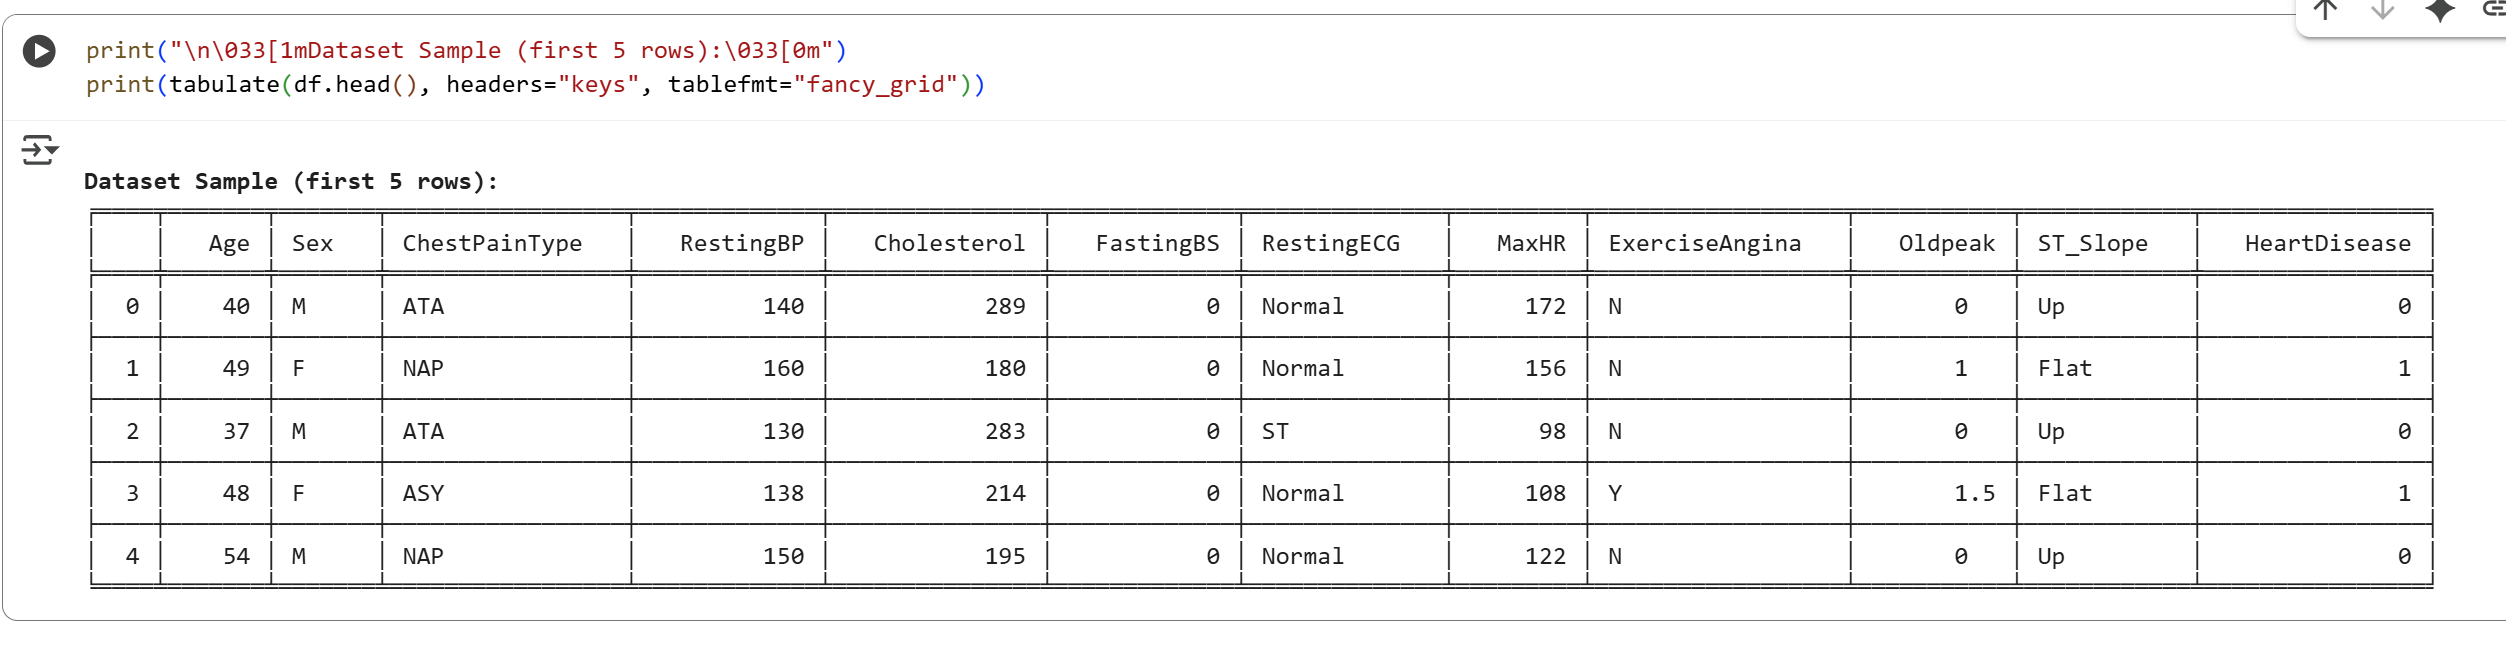

In [ ]:
from IPython.display import Image, display

display(Image("/content/dataset.png"))

*We displayed the table as a photo for a better represntaiton*

In [ ]:
print("\n\033[1mDataset Sample (first 5 rows):\033[0m")
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid"))


Dataset Sample (first 5 rows):
╒════╤═══════╤═══════╤═════════════════╤═════════════╤═══════════════╤═════════════╤══════════════╤═════════╤══════════════════╤═══════════╤════════════╤════════════════╕
│    │   Age │ Sex   │ ChestPainType   │   RestingBP │   Cholesterol │   FastingBS │ RestingECG   │   MaxHR │ ExerciseAngina   │   Oldpeak │ ST_Slope   │   HeartDisease │
╞════╪═══════╪═══════╪═════════════════╪═════════════╪═══════════════╪═════════════╪══════════════╪═════════╪══════════════════╪═══════════╪════════════╪════════════════╡
│  0 │    40 │ M     │ ATA             │         140 │           289 │           0 │ Normal       │     172 │ N                │       0   │ Up         │              0 │
├────┼───────┼───────┼─────────────────┼─────────────┼───────────────┼─────────────┼──────────────┼─────────┼──────────────────┼───────────┼────────────┼────────────────┤
│  1 │    49 │ F     │ NAP             │         160 │           180 │           0 │ Normal       │     156 │ N  

## ***Phase 2:***

**Statistic summery:**

In [4]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Age:** Patients’ ages range from 28 to 77, with a median of 54 and a mean of 53.5, indicating a middle-aged population. Most patients are in the middle-aged to elderly range, as 50% of the patients are aged 54 or older, while 25% are younger than 47.

**RestingBP:** The values have a mean of 132.4 and a median of 130. The interquartile range is 120 to 140, showing that most patients have normal blood pressure levels. However, a minimum value of 0 suggests data errors, which will be handled later.

**Cholesterol:** The majority of patients (IQR: 173 to 267) fall within normal (<200) to borderline high (>240) cholesterol levels. However, a minimum value of 0 suggests data errors, which will be handled later.

**FastingBS:** Most patients (76.7%) have normal fasting blood sugar levels (0), while a small portion (23.3%) have elevated levels (1).

**MaxHR:** Maximum heart rates vary between 60 and 202, with a median of 138, indicating diverse cardiovascular performance.

**Oldpeak:** The IQR (0 to 1.5) means most patients experience mild to moderate ST depression during exercise, which is a common indicator of ischemia (reduced blood flow due to a blockage or narrowing of blood vessels) or heart disease.

**HeartDisease:** The target variable indicates that 55.3% of patients have heart disease, while 44.7% do not, showing a relatively balanced distribution with a slight majority having heart disease.

**Box plot:**

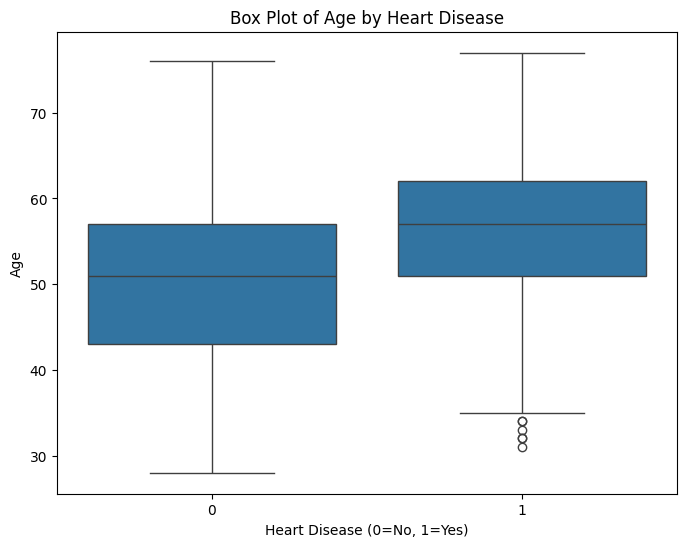

In [8]:
# (A) Boxplot: Age by Heart Disease
plt.figure(figsize=(8,6))
sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.title("Box Plot of Age by Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()